# Binary Batch Distillation
This is the eighth problem of the famous set of [Ten Problems in Chemical Engineering](https://www.polymath-software.com/ASEE/Tenprobs.pdf).  Here, the goal is to solve a system of equations comprised of ordinary differential equations and nonlinear algebraic equations.

Jacob Albrecht, 2019

# Problem Setup

For binary distillation, the moles of liquid remaining change as a function of mole fraction of species 2 (toluene)

$$\frac{dL}{dx_2} = \frac{L}{x_2\left(k_2-1\right)}$$

Antoine equation for species $i$:

$$P_{vap,i} = 10^{A-\frac{B}{T+C}}$$

The vapor liquid equilibrium ratio for each species:
$$k_i = P_{vap,i}/P$$

The constraint to enforce is to ensure the overall pressure does not change: 
$$x_1P_{vap,1}+x_2P_{vap,2} = P$$
or
$$k_1x_1+k_2x_2=1$$

# Problem Tasks

The batch distillation of benzene (component 1) and toluene (component 2) mixture is being carried out at a pressure of 1.2 atm. Initially, there are 100 moles of liquid in the still, comprised of 60% benzene and 40% toluene (mole fraction basis). Calculate the amount of liquid remaining in the still when concentration of toluene reaches 80%.

# Solutions

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import root
import matplotlib.pyplot as plt
%matplotlib inline

A = np.array([6.90565,6.95464])
B = np.array([1211.033,1344.8])
C = np.array([220.79,219.482])
P = 1.2*760
L0 = [100]
x_start = 0.40
x_final = 0.80
T_guess = (80.1+110.6)/2
xspan = [x_start, x_final]

def Pvap_constraint(T,x2):
    x = np.array([1-x2,x2])
    P_i = 10**(A-B/(T+C))
    k = P_i/P
    obj = 1 - np.dot(k,x) # make sure partial pressures sum to system pressure
    return(obj)

def distill(x2,L):
    Topt = root(Pvap_constraint,T_guess,args=(x2))
    P_i = 10**(A-B/(Topt.x+C))
    k = P_i/P
    dL_dx = L/(x2*(k[1]-1))
    return(dL_dx)

sol=solve_ivp(distill,xspan,L0,method='LSODA') # LSODA is an implicit ODE solver 



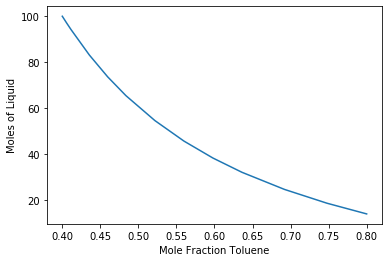

In [2]:
plt.plot(sol.t,sol.y[0,:])
plt.xlabel('Mole Fraction Toluene')
plt.ylabel('Moles of Liquid')
plt.show()

In [3]:
print('At 80% Toluene, there are {:.3} moles of liquid'.format(sol.y[0,-1]))

At 80% Toluene, there are 14.1 moles of liquid


# Reference
“The Use of Mathematical Software packages in Chemical Engineering”, Michael B. Cutlip, John J. Hwalek, Eric H.
Nuttal, Mordechai Shacham, Workshop Material from Session 12, Chemical Engineering Summer School, Snowbird,
Utah, Aug., 1997.

In [4]:
%load_ext watermark
%watermark -v -p scipy,matplotlib,numpy

CPython 3.7.3
IPython 7.6.1

scipy 1.3.0
matplotlib 3.1.0
numpy 1.16.4
